In [1]:
import numpy as np
import pickle
from scipy.stats import pearsonr
import sys

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils_spatial as utils_spatial

In [2]:
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8.pickle','rb'))
ddf = outliers.load_metadata(Yaudio, metadata_file='../data/metadata.csv')
w, data_countries = utils_spatial.get_neighbors_for_countries_in_dataset(Y)
w_dict = utils_spatial.from_weights_to_dict(w, data_countries)
Xrhy, Xmel, Xmfc, Xchr = X_list
X = np.concatenate((Xrhy, Xmel, Xmfc, Xchr), axis=1)

Island ids:  [3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121]
Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago
most outliers 
           Country  Outliers
60            Chad  0.636364
86          Gambia  0.540000
17   French Guiana  0.535714
43           Benin  0.500000
78     El Salvador  0.484848
136       Botswana  0.477778
6          Bolivia  0.457143
104         Bhutan  0.454545
14         Liberia  0.450000
63         Senegal  0.439024
least outliers 
                              Country  Outliers
1                           Lithuania  0.000000
120                        Kazakhstan  0.000000
119                           Denmark  0.000000
107                          Kiribati  0.000000
109  Democratic Republic of the Congo  0.042553
105                      

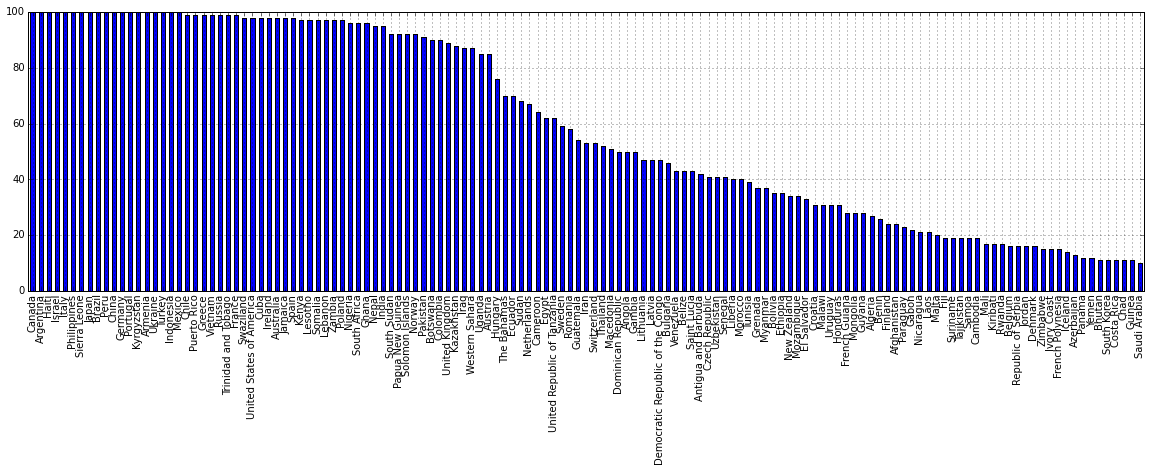

In [9]:
import pandas as pd
df_country = pd.DataFrame(data=Y, columns=['country'])
plt.figure(figsize=(20, 5))
df_country['country'].value_counts().plot(kind='bar');

In [30]:
# global outliers
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
df_global['N'] = np.zeros(len(df_global))
df_global['OutliersN'] = np.zeros(len(df_global))
for i, country in enumerate(df_global['Country']):
    n_counts = len(np.where(Y==country)[0])
    df_global['N'].iloc[i] = n_counts
    df_global['OutliersN'].iloc[i] = np.round(n_counts * df_global['Outliers'].iloc[i])
df_global.head()

Country  Outliers    N  OutliersN
0     Canada  0.060000  100          6
1  Lithuania  0.000000   47          0
2   Cambodia  0.263158   19          5
3   Ethiopia  0.257143   35          9
4  Swaziland  0.142857   98         14

0.662469099039 1.18268680985e-18


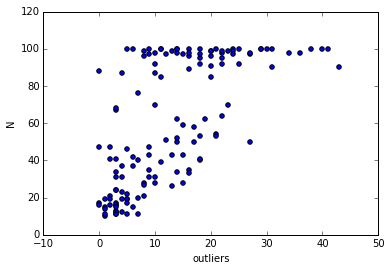

In [39]:
corr, pval = pearsonr(df_global['OutliersN'], df_global['N'])
print corr, pval

plt.scatter(df_global['OutliersN'], df_global['N'])
plt.xlabel('outliers')
plt.ylabel('N')

-0.122714085273 0.153126076772


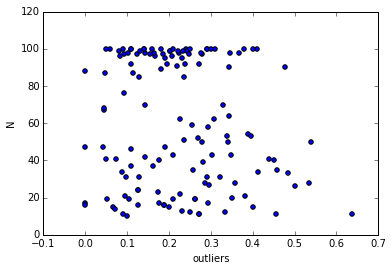

In [42]:
corr, pval = pearsonr(df_global['Outliers'], df_global['N'])
print corr, pval

plt.scatter(df_global['Outliers'], df_global['N'])
plt.xlabel('outliers')
plt.ylabel('N')